**Group Members**

1. 

2.

3.

# **Load Dependencies**

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Supermarket Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

In [ ]:
#df = pd.read_csv('Supermarket Data.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  ...  STORE_FORMAT  STORE_REGION
956569     200617 2006-06-22  ...            LS           W01
956570     200633 2006-10-13  ...            LS           W01
956571     200617 2006-06-22  ...            LS           W01
956572     200619 2006-07-06  ...            LS           W01
956573     200635 2006-10-23  ...            LS           W01

[5 rows x 22 columns]

In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  ...  STORE_FORMAT  STORE_REGION
0          200732 2007-10-05  ...            LS           E02
1          200733 2007-10-10  ...            LS           E02
2          200741 2007-12-09  ...            LS           E02
3          200731 2007-09-29  ...            LS           E02
4          200737 2007-11-10  ...            LS           E02
...           ...        ...  ...           ...           ...
956569     200617 2006-06-22  ...            LS           W01
956570     200633 2006-10-13  ...            LS           W01
956571     200617 2006-06-22  ...            LS           W01
956572     200619 2006-07-06  ...            LS           W01
956573     200635 2006-10-23  ...            LS           W01

[956574 rows x 22 columns]>

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

CUST_PRICE_SENSITIVITY

Spend per quantity

Ticket size

Recency 




# Calculate features

In [ ]:
#choosing new features
df['CUST_PRICE_SENSITIVITY'].replace(to_replace=['LA','MM','UM','XX'], value=[1,2,3,0], inplace=True)
#df['BASKET_SIZE'].replace(to_replace=['L','M','S'], value=[1,2,3], inplace=True)


In [ ]:
#prepare Customer single view 
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  TotalQuantity=('QUANTITY', 'sum'),
                                                                                  CustPrice=('CUST_PRICE_SENSITIVITY', 'max')
                                                                                  #BasketSize=('BASKET_SIZE', 'max')
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
#calculate spend per quantity
df_csv['SpendPerQuantity'] = df_csv['TotalSpend']/df_csv['TotalQuantity']

In [ ]:
df_csv.head(5)

CUST_CODE  TotalSpend  ...  recency  SpendPerQuantity
0  CUST0000000181        2.44  ...      547          2.440000
1  CUST0000000369      959.33  ...        1          1.039361
2  CUST0000000689      328.57  ...       13          0.983743
3  CUST0000000998        5.95  ...      730          0.991667
4  CUST0000001163       39.74  ...       14          1.168824

[5 rows x 12 columns]

# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  4839
1                            Original Data            (6100, 12)
2                           Missing Values                 False
3                         Numeric Features                     9
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data             (6100, 9)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  e58a
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [ ]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      -0.096           121.0592  ...           0             0

[1 rows x 6 columns]

In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.9063           164.2046  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.2995          2162.3104  ...           0             0

[1 rows x 6 columns]

In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4839, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

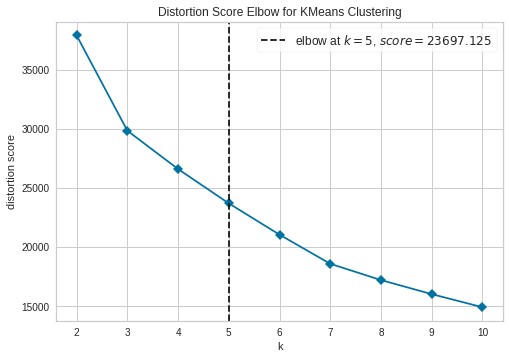

In [ ]:
plot_model(kmeans, plot = 'elbow')

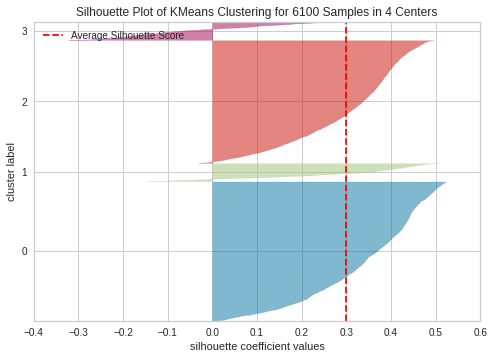

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
kmeans_results = assign_model(kmeans)
kmeans_results.head(10)

CUST_CODE  TotalSpend  ...  SpendPerQuantity    Cluster
0  CUST0000000181        2.44  ...          2.440000  Cluster 0
1  CUST0000000369      959.33  ...          1.039361  Cluster 1
2  CUST0000000689      328.57  ...          0.983743  Cluster 2
3  CUST0000000998        5.95  ...          0.991667  Cluster 0
4  CUST0000001163       39.74  ...          1.168824  Cluster 2
5  CUST0000001194     2493.83  ...          1.462657  Cluster 1
6  CUST0000002257        1.99  ...          1.990000  Cluster 0
7  CUST0000002499        0.34  ...          0.340000  Cluster 0
8  CUST0000002605        1.80  ...          0.300000  Cluster 2
9  CUST0000002637      124.63  ...          0.989127  Cluster 2

[10 rows x 13 columns]

In [ ]:
#number of customers in each clusters
kmeans_df = assign_model(kmeans)
kmeans_df.groupby('Cluster').describe()


TotalSpend                            ... SpendPerQuantity                    
               count         mean          std  ...              50%       75%       max
Cluster                                         ...                                     
Cluster 0     2856.0    11.140823    20.403251  ...         1.020000  1.425625   4.92000
Cluster 1      366.0  2526.647186  1435.234132  ...         1.256008  1.423330   2.38444
Cluster 2     2518.0   198.933507   273.411715  ...         1.212940  1.495974   5.52000
Cluster 3      360.0   120.411278   199.001621  ...         1.980600  4.922500  25.30000

[4 rows x 72 columns]

In [ ]:
AVG_SPEND = kmeans_results.groupby('Cluster').mean()
AVG_SPEND.head()

TotalSpend  TotalVisits  ...     recency  SpendPerQuantity
Cluster                              ...                              
Cluster 0    11.140823     1.782213  ...  431.343838          1.144871
Cluster 1  2526.647186   172.131148  ...    5.631148          1.253190
Cluster 2   198.933507    21.079031  ...   53.359412          1.285401
Cluster 3   120.411278     2.808333  ...  317.747222          3.723818

[4 rows x 9 columns]

In [ ]:
#count per clusters 
plot_model(kmeans, plot = 'distribution')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSpend')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'recency')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'TicketSize')

# **Interpret results and plan for actions**

**Cluster 1**: **Super best friend** with 366 persons. The cluster of less but quality. They come to our supermarket a lot. The average total spend of them is 2526 which is the highest spend of all clusters. They buy plenty of products about 2074 quantity. The recency is 5.63 (shortest). It means the more recently a customer has made a purchase with our store, the more likely they will continue to keep the business for subsequent purchases. The low recency is the sign of they might switch to brand competitors although they have loyal to us. The average ticket size is 18.58 which is a value that tells us about what amount of money that each buyer spends per visit.

**Plan to action**: 
- They are pure gold customers. Should keep them happy and gain loyalty from them. 
- Understand the reasons why they become customers with our store. 
- Give them a high level of service 
Apply personalization such as a surprise coupon discount. Send promotion coupons to a direct email or another contact. 
- Feedback is key. Survey about pain points of customers and plan solutions to fix them immediately. 

**Cluster 2: (almost) best friend.** They are a huge cluster with 2518 buyers. They spend quite much about 198 which is the second-highest spend.  The average total visit is 21.08. They sometimes come but sometimes don’t. However, they buy about 157 quantities not as high as the quantity of our super best friend but it’s higher than the rest of the group.  The recency is 53.56 and the average ticket size is 9.69

**Plan to action:** 
- They will be the super best friends if you treat them well. 
- Make them buy more by upselling which persuading them to buy higher-priced items
Cross-selling is an option to buy related products to increase basket size.
- Improve their experience and apply personalization as a cluster of super best friends. 
- Social media analysis for collecting feedback from customers. How they about us. For a deeper understanding of customers’ behavior and demographics. 

 
**Cluster 3: Long lost friend.** Even if they are the smallest group but they influence us in some way. The average total spend is similar to the (almost) best friend cluster with around 120.41. Although they spend quite a lot, they still don’t often come to our store. The average total visit is low(2.8). The average total quantity is 73.03. When considering the ticket size of this cluster found that they have the highest ticket size with 40.41.  The recency is 317.75. (second longest) 

**Plan to action:**   
- They are the type of win-back customers. 
- Analyze buying pattern which is purchase decision and customers’ behavior in the past. 
- Make them feel personalized by directing text with a message like “Haven’t seen you in a while we have a special offer for you” “Come back and receive”
- Calculate the customer’s lifetime value. 

**Cluster 0: A stranger** aka those barely bring in any revenue and are not necessarily loyal to ours. (it’s sad but it is true) The biggest cluster of our supermarket (2856). They hardly come to our store. Their average total visit is an average of 1.78 (lowest). They spend less about 11.14. It is a group of customers who rarely come and when they come they rarely buy anyway. The average ticket size is 5.57(lowest). The recency is 431.34 (longest). 

**Plan to action:** 
- Don’t just eliminate our strangers, they can turn into best friends someday. 
- Churn analysis to predict the trend of the number of customers who will leave our store. 
- Risk or fraud pattern to analyze if the customer is at risk of discontinuing purchase. 


